In [0]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model

np.random.seed(1)

In [0]:
#Creating random data using sklearn
def load_extra_datasets():
  N = 200
  gaussian_quantiles = sklearn.datasets.make_gaussian_quantiles(mean= None, cov=0.7, n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=None,)
  return gaussian_quantiles


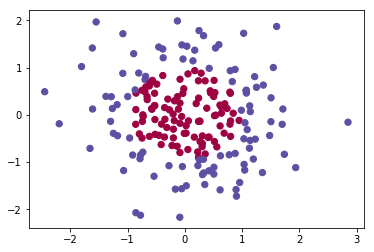

In [21]:

#Callig the function
gaussian_quantiles = load_extra_datasets()
X,Y = gaussian_quantiles
X, Y = X.T, Y.reshape(1, Y.shape[0])

#Ploting the data
plt.scatter(X[0, :], X[1, :], c=Y.ravel(), s=40, cmap=plt.cm.Spectral);


In [0]:
#Defining the layers for the NN
def layer_size(X, Y):
  #Size of the input layer
  n_x = X.shape[0]
  #Number of Hidden layers
  n_h = 4
  #Size of the output layer
  n_y = Y.shape[0]
  return (n_x, n_h, n_y)

In [0]:
#Inizialice the weight of the parameters for each layers
def initialize_parameteres(n_x, n_h, n_y):
  W1 = np.random.randn(n_h, n_x) * 0.01
  b1 = np.zeros(shape=(n_h, 1))
  W2 = np.random.randn(shape=(n_y, n_h)) * 0.01
  b2 = np.zeros(shape=(n_y, 1))

  parameters = {"W1" : W1, "b1" : b1, "W2" : W2, "b2" : b2}

  return parameters

In [0]:
def forward_propagation(X, parameters):
  W1 = parameters["W1"]
  b1 = parameters["b1"]
  W2 = parameters["W2"]
  b2 = parameters["b2"]

  #Implementing forward preparation
  #Createing the matrix
  Z1 = np.dot(W1, X) + b1
  #Using tanh function
  A1 = np.tanh(Z1)
  Z2A = np.dot(W2, A1)
  Z2 = np.dot(W2, A1) + b2
  A2 = sigmoid(Z2)

  cache = {"Z1" : Z1, "A1" : A1, "Z2" : Z2, "A2" : A2}

  return A2, cache

In [0]:
def compute_cost(A2, Y, parameteres):
  m = Y.shape[0]

  logprobs = np.multiply(np.log(A2), Y) + np.multiply((1-Y), np.log(1 - A2))

  cost = np.sum(logprobs) / m

  cost = np.squeeze(cost)

  return cost

In [0]:
def backward_propagation(parameters, cache, X, Y):

  m = X.shape[1]

  W1 = parameters["W1"]
  W2 = parameters["W2"]

  A1 = cache["A1"]
  A2 = cache["A2"]

  dZ2 = A2 - Y
  dW2 = (1 / m) * np.dot(dZ2, A1.T)
  db2 = (1 / m ) * np.sum(dZ2, axis = 1, keepdims=True)
  dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))

  dW1 = (1 / m) * np.dot(dZ1, X.T)
  db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)

  grads = {"dW1" : dW1, "db1" : db1, "dW2" : dW2, "db2" : db2}

  return grads
  


In [0]:
def update_parameters(parameters, grads, learning_rate = 1.2):
  W1 = parameters["W1"]
  b1 = parameters["b1"]
  W2 = parameters["W2"]
  b2 = parameters["b2"]

  dW1 = grads["dW1"]
  db1 = grads["db1"]
  dW2 = grads["dW2"]
  db2 = grads["db2"]

  parameters = {"W1" : W1, "b1" : b1, "W2" : W2, "b2" : b2}

  return parameters

In [0]:
#Building the NN

def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
  